## Star Wars survey

Here I research what movies are most popular by what audience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#Create a dictionary to map the data types to boolean
boolean_mapping = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in \
the Star Wars franchise?"] = star_wars["Have you seen any of \
the 6 films in the Star Wars franchise?"].map(boolean_mapping)

In [5]:
#Apply boolean mapping to the other column too
star_wars["Do you consider yourself to be a fan of the \
Star Wars film franchise?"] = star_wars["Do you consider yourself \
to be a fan of the Star Wars film franchise?"].map(boolean_mapping)

In [6]:
# change the content to True or if empty to False
movie_mappings = {
   
    star_wars[star_wars.columns[3]][0]: True, 
    star_wars[star_wars.columns[4]][0]: True,
    star_wars[star_wars.columns[5]][0]: True,
    star_wars[star_wars.columns[6]][0]: True,
    star_wars[star_wars.columns[7]][0]: True,
    star_wars[star_wars.columns[8]][0]: True,
    np.nan: False

}

In [7]:
# Loop over each column and apply the mappings from above
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mappings)

In [8]:
star_wars[star_wars.columns[3:9]]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [9]:
# map new column names
new_cols = {}
for i, col in enumerate(star_wars.columns[3:9], 1):
    new_cols[col] = f"seen_{i}"

In [10]:
# view the col_names mappings
new_cols

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [11]:
# Map the new column names to the star wars Dataframe
star_wars = star_wars.rename(columns=new_cols)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
# Change column types to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars\
                                               .columns[9:15]]\
                                               .astype(float)
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [13]:
# map new column names
new_cols_rank = {}
for i, col in enumerate(star_wars.columns[9:15], 1):
    new_cols_rank[col] = f"ranking_{i}"
new_cols_rank

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [14]:
# Map the new column names to the star wars Dataframe
star_wars = star_wars.rename(columns=new_cols_rank)
star_wars.iloc[:,9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [15]:
# Isolate the ranking columns
ranking_df = star_wars.iloc[:, 9:15]

In [16]:
# Compute the mean of each column of the ranking_df - the lower the 
# rating, the more favorable it is
cols_means = {}
for col in ranking_df.columns:
    cols_means[col] = round(ranking_df[col].mean(), 1)
cols_means

{'ranking_1': 3.7,
 'ranking_2': 4.1,
 'ranking_3': 4.3,
 'ranking_4': 3.3,
 'ranking_5': 2.5,
 'ranking_6': 3.0}

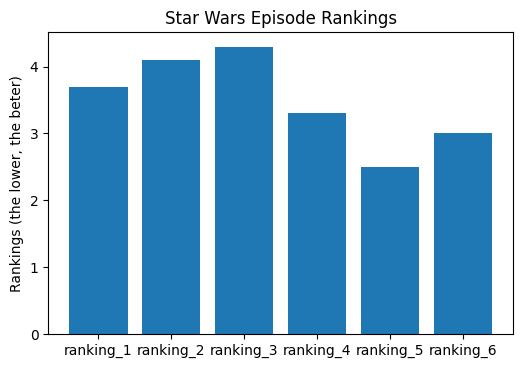

In [17]:
# Plot a bar chart of each seen
%matplotlib inline

plt.bar(cols_means.keys(), cols_means.values())
plt.title("Star Wars Episode Rankings")
plt.ylabel("Rankings (the lower, the beter)")
plt.show()

Ranking_5 which represents: "Star Wars: Episode V The Empire Strikes Back", is ranked as the highest.

In [18]:
# dataframe of the movies seen
df_seen = star_wars.iloc[:,3:9]
df_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [19]:
# Count how many people saw each movie
seen_counts = {}
for col in df_seen.columns:
    counts = df_seen[col].sum()
    seen_counts[col] = counts
seen_counts    

{'seen_1': 673,
 'seen_2': 571,
 'seen_3': 550,
 'seen_4': 607,
 'seen_5': 758,
 'seen_6': 738}

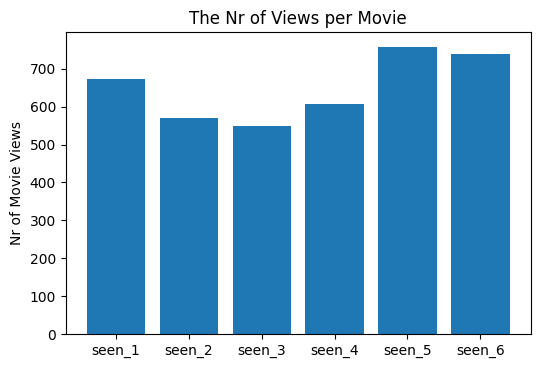

In [20]:
# View the seen counts in a bar chart
plt.bar(seen_counts.keys(), seen_counts.values())
plt.ylabel("Nr of Movie Views")
plt.title("The Nr of Views per Movie")
plt.show()

It is not surprising to see that the movie that was rated the highest, was also the one that was viewd the most. That's why we need to investigate more to find out which movie was 'really' the most favorable. 

In [21]:
# Split the fan base group of Star Wars movies into
# 2 groups: true vs. false

fan_starsWars = "Do you consider yourself to be a fan of the \
Star Wars film franchise?"

fan_starWars_true = star_wars[star_wars[fan_starsWars] == True]

fan_starWars_false = star_wars[star_wars[fan_starsWars] == False]

In [22]:
# Split the fan base group of Star Trek frenchise into
# 2 groups: yes vs. no

fan_starsTrek_fr = "Do you consider yourself to be a fan of the \
Star Trek franchise?"

fan_starTrek_fr_yes = star_wars[star_wars[fan_starsTrek_fr] == "Yes"]

fan_starTrek_fr_no = star_wars[star_wars[fan_starsTrek_fr] == "No"]

In [23]:
# Combine the above groups and their statistics into a dictionary
segmentGr_stats = {"fan_starWars_true": fan_starWars_true\
                   [fan_starsWars].sum(),
                  "fan_starWars_false": fan_starWars_false\
                   [fan_starsWars].count(),
                  "fan_starTrek_fr_yes": fan_starTrek_fr_yes\
                   [fan_starsTrek_fr].count(),
                  "fan_starTrek_fr_no": fan_starTrek_fr_no\
                   [fan_starsTrek_fr].count()
                  }

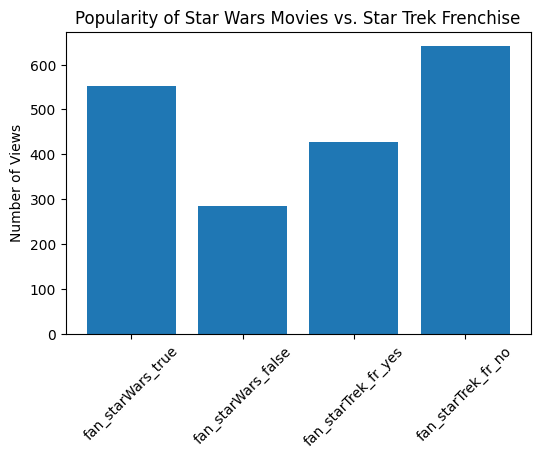

In [24]:
# Plot the segmentGr_stats
plt.bar(segmentGr_stats.keys(), segmentGr_stats.values())
plt.title("Popularity of Star Wars Movies vs. Star Trek Frenchise")
plt.ylabel("Number of Views")
plt.xticks(rotation=45)
plt.show()

# Examening the differences in Gender

In [25]:
# Male star wars movie fans
males_df = star_wars[star_wars["Gender"] == "Male"]
male_fans = males_df[males_df[fan_starsWars] == True]

In [26]:
# Females star_wars movie fans
females_df = star_wars[star_wars["Gender"] == "Female"]
female_fans = females_df[females_df[fan_starsWars] == True]

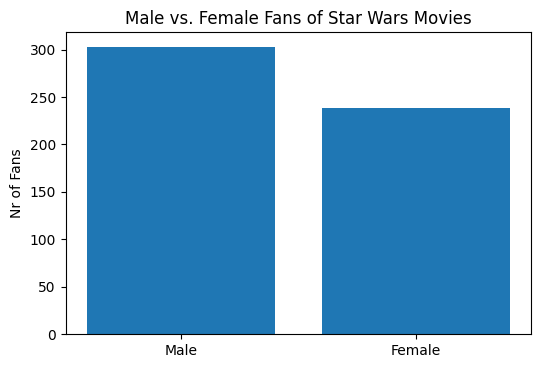

In [27]:
# plot of male vs.female fans
fans_by_gender = {"Male": male_fans.shape[0],
                  "Female": female_fans.shape[0]}
plt.bar(fans_by_gender.keys(), fans_by_gender.values())
plt.title("Male vs. Female Fans of Star Wars Movies")
plt.ylabel("Nr of Fans")
plt.show()

In [28]:
# Male Star-Trek Frenchise Fans
male_starTr_fans = males_df[males_df[fan_starsTrek_fr] == "Yes"]

In [29]:
# Female Star-Trek Frenchise Fans
female_starTr_fans = females_df[females_df[fan_starsTrek_fr] == "Yes"]

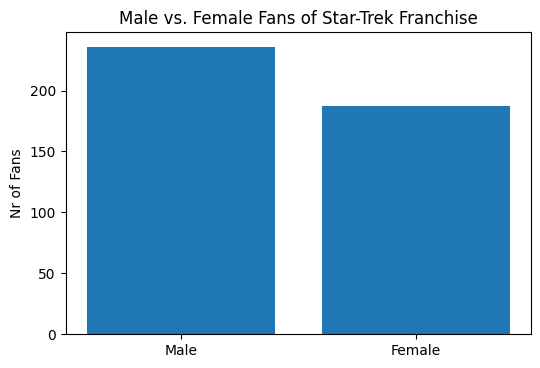

In [30]:
# Plot of male vs. female Star-Trek Franchise Fans
fans_by_gender_starTr = {"Male": male_starTr_fans.shape[0],
                  "Female": female_starTr_fans.shape[0]}
plt.bar(fans_by_gender_starTr.keys(), fans_by_gender_starTr.values())
plt.title("Male vs. Female Fans of Star-Trek Franchise")
plt.ylabel("Nr of Fans")
plt.show()

It turns out that men are the biggest fans of both Star Wars movies
and Star-Trek Frenchise. This is valuable insights for the owners 
of the Star Wars company, as they can use these insights to target more 
females (or create female friendly movies) as new customers. Alternately,
they can also focus their market strategies on men.